# Gradient Descent Algorithm

## Computing the minimum of a function

Suppose we want to find the minimum of the function $$ f(x,y) = (x-47)^2 + (y - 0.1)^2 + 2. $$

In [1]:
#------------------------
# Import packages
#------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Change the plotting style
plt.style.use('seaborn-whitegrid')


We create the functions for our calculations such as $f$ and the gradient of $f$.

The gradient of f(x,y) is:
$ \frac{\partial f}{\partial x} = 2(x - 47) $
$ \frac{\partial f}{\partial y} = 2(y - 0.1) $

In [2]:
#------------------------
# Create functions
#------------------------
# Input into the fuctions is vector X, where X = (x,y)
# Create the function we want to find the minimum of
def f(X):
    #TODO: implement this part of code
    x, y = X
    return (x - 47)**2 + (y - 0.1)**2 + 2

# Create the gradient vector
def gradf(X):
    #TODO: implement this part of code
    x, y = X
    df_dx = 2 * (x - 47)
    df_dy = 2 * (y - 0.1)
    return np.array([df_dx, df_dy])

We can plot $f$ as well.

C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1324\1354137736.py:23: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(contour, label='f(x, y) value') # Add a color bar to show the Z values


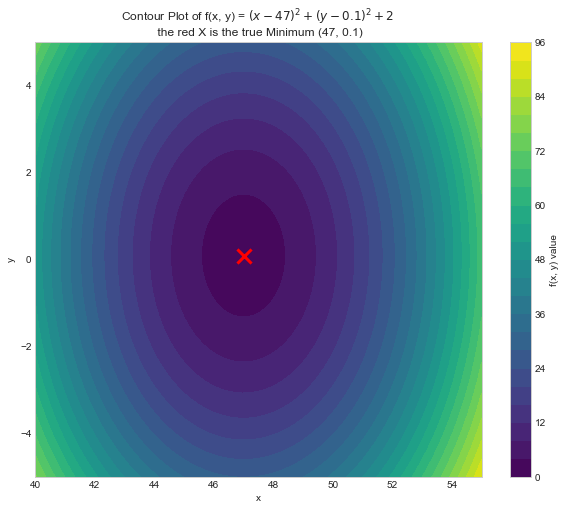

In [3]:
#TODO: implement this part of code

# --- Plotting the function as a Contour Plot ---

# Define the range for x and y values, better to be these ranges around the known minimum (47, 0.1)
x_range = np.linspace(40, 55, 100)  # From 40 to 55, with 100 points
y_range = np.linspace(-5, 5, 100)  # From -5 to 5, with 100 points

# Create a meshgrid from the x and y ranges
X_grid, Y_grid = np.meshgrid(x_range, y_range) 

# Calculate the Z values (f(x,y)) for each point in the grid
Z_grid = f(np.array([X_grid, Y_grid]))

# Set the figure size
plt.figure(figsize=(10, 8))

# Plotting contour 
contour = plt.contourf(X_grid, Y_grid, Z_grid, levels=25, cmap='viridis')
# levels specifies the number of contour lines/regions
# cmap specifies the colormap (e.g., 'viridis', 'plasma', 'hot', 'jet')

plt.colorbar(contour, label='f(x, y) value') # Add a color bar to show the Z values

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Contour Plot of f(x, y) = $(x - 47)^2 + (y - 0.1)^2 + 2$ \n the red X is the true Minimum (47, 0.1)')

# Marking the true minimum point
plt.scatter(47, 0.1, color='red', marker='x', s=200, linewidth=3)

plt.grid(True) # Add a grid
plt.show()

C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1324\2079937657.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  fig.colorbar(surf, shrink=0.5, aspect=5, label='f(x, y) value')


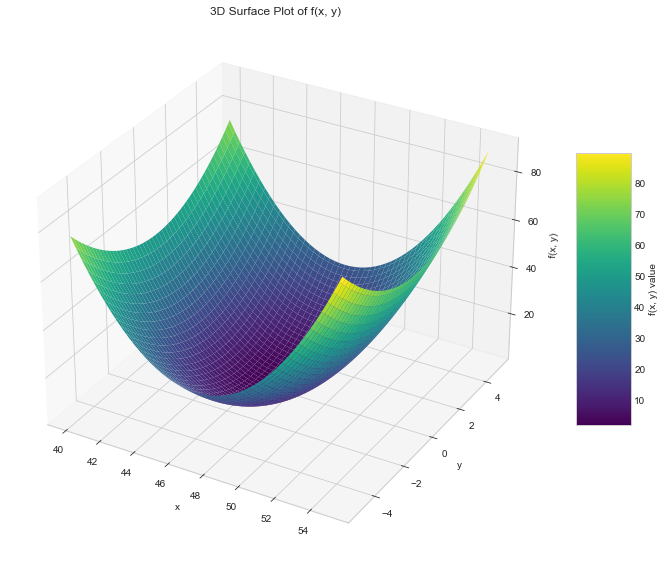

In [4]:
#TODO: implement this part of code

# --- Plotting 3D Surface Plot ---

from mpl_toolkits.mplot3d import Axes3D #import specific tools from matplotlib

fig = plt.figure(figsize=(12, 10))# Set the figure size
ax = fig.add_subplot(111, projection='3d')

# Plotting surface
surf = ax.plot_surface(X_grid, Y_grid, Z_grid, cmap='viridis', edgecolor='none')
fig.colorbar(surf, shrink=0.5, aspect=5, label='f(x, y) value')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.set_title('3D Surface Plot of f(x, y)')
plt.show()

Now, we will start our gradient descent algorithm.  Here, we will start at the point $P=(80, 20)$.

In [5]:
#TODO: implement this part of code

# Assuming P = (80, 20) as the starting point
P = np.array([80.0, 20.0])

# Parameters for gradient descent
learning_rate = 0.1 # The size of steps that can be adjusted
num_iterations = 100 # Number of steps to take

# List to store the points during the descent
xyValuesList = [P.copy()] # Start with the initial point

for i in range(num_iterations):
    gradient = gradf(P)
    P = P - learning_rate * gradient
    xyValuesList.append(P.copy())

# Convert the list of points to a NumPy array for easier processing
xyValuesList = np.array(xyValuesList)

We can plot the $(x,y)$ points from our algorithm as well.  First, we create a dataframe with all of the points from the xyValuesList.

In [6]:
#TODO: implement this part of code

df_points = pd.DataFrame(xyValuesList, columns=['x', 'y'])

We will plot these point on a contour diagram to see how they move toward the minimum of $f$.

C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1324\1627582858.py:22: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='f(x, y)')


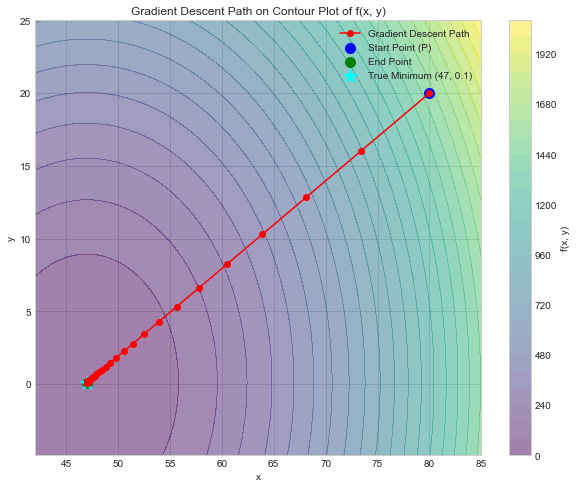

In [7]:
#TODO: implement this part of code

# Create a grid for the contour plot
x_min, x_max = df_points['x'].min() - 5, df_points['x'].max() + 5
y_min, y_max = df_points['y'].min() - 5, df_points['y'].max() + 5

# Ensure the grid covers the actual minimum (47, 0.1)
x_min = min(x_min, 45)
x_max = max(x_max, 50)
y_min = min(y_min, -2)
y_max = max(y_max, 3)

# Create a meshgrid from the x and y ranges
X_grid, Y_grid = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

# Calculate the Z values (f(x,y)) for each point in the grid
Z_grid = f(np.array([X_grid, Y_grid]))

# Set the figure size & Add labels and title
plt.figure(figsize=(10, 8))
plt.contourf(X_grid, Y_grid, Z_grid, levels=25, cmap='viridis', alpha=0.5)
plt.colorbar(label='f(x, y)')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Gradient Descent Path on Contour Plot of f(x, y)')
# levels specifies the number of contour lines/regions
# cmap specifies the colormap (e.g., 'viridis', 'plasma', 'hot', 'jet')

# Plot the path of the gradient descent with labels
plt.plot(df_points['x'], df_points['y'], marker='o', linestyle='-', color='red', label='Gradient Descent Path')
plt.scatter(df_points['x'].iloc[0], df_points['y'].iloc[0], color='blue', s=100, label='Start Point (P)')
plt.scatter(df_points['x'].iloc[-1], df_points['y'].iloc[-1], color='green', s=100, label='End Point')
plt.scatter(47, 0.1, color='cyan', marker='*', s=200, label='True Minimum (47, 0.1)') 

# Plot the true minimum
plt.legend()

plt.grid(True)
plt.show()


### Finding the Optimal Step Size for Gradient Descent

### Symbolic Calculation of Optimal Step Size

We want to find the optimal step size $\alpha$ for a single gradient descent step from our starting point $\mathbf{x}_0 = (80, 20)$. We use symbolic mathematics to derive an exact solution.

First, we define our objective function:
$$f(\mathbf{x}) = (x - 47)^2 + (y - 0.1)^2 + 2$$

The gradient of this function is:
$$\nabla f(\mathbf{x}) = \begin{pmatrix} 2(x - 47) \\ 2(y - 0.1) \end{pmatrix}$$

For our starting point $\mathbf{x}_0 = (80, 20)$, the gradient is:
$$\nabla f(\mathbf{x}_0) = \begin{pmatrix} 2(80 - 47) \\ 2(20 - 0.1) \end{pmatrix} = \begin{pmatrix} 66 \\ 39.8 \end{pmatrix}$$

The next point in gradient descent is given by:
$$\mathbf{x}_1 = \mathbf{x}_0 - \alpha \nabla f(\mathbf{x}_0)$$

Substituting our values:
$$\mathbf{x}_1 = \begin{pmatrix} 80 \\ 20 \end{pmatrix} - \alpha \begin{pmatrix} 66 \\ 39.8 \end{pmatrix} = \begin{pmatrix} 80 - 66\alpha \\ 20 - 39.8\alpha \end{pmatrix}$$

Now we define a function $\phi(\alpha)$ which is our objective function evaluated at $\mathbf{x}_1$:
$$\phi(\alpha) = f(\mathbf{x}_1) = (80 - 66\alpha - 47)^2 + (20 - 39.8\alpha - 0.1)^2 + 2$$

Simplifying:
$$\phi(\alpha) = (33 - 66\alpha)^2 + (19.9 - 39.8\alpha)^2 + 2$$

To find the optimal $\alpha$, we take the derivative of $\phi(\alpha)$ with respect to $\alpha$ and set it to zero:
$$\frac{d\phi}{d\alpha} = -2 \cdot 66 \cdot (33 - 66\alpha) - 2 \cdot 39.8 \cdot (19.9 - 39.8\alpha) = 0$$

Simplifying:
$$-132(33 - 66\alpha) - 79.6(19.9 - 39.8\alpha) = 0$$
$$-4356 + 8712\alpha - 1584.04 + 3168.08\alpha = 0$$
$$11880.08\alpha = 5940.04$$
$$\alpha = 0.5$$

Therefore, the optimal step size for the first iteration of gradient descent is 0.5.

### creating a function that perform the GD algorithm

#### implement the GD algorithm, with options to fixed alpha, backtracking line search (Armijo and Wolfe Conditions)

In [8]:
def gradient_descent(f, grad_f, x0, alpha_type='fixed', alpha=0.01, 
                     max_steps=1000, tolerance=0.0001, 
                     c1=1e-4, c2=0.9, rho=0.5, max_line_search_iter=20):
    """
    Gradient descent optimization algorithm.
    
    Parameters:
    -----------
    f : function
        The objective function to minimize, should take a numpy array as input.
    grad_f : function
        The gradient of the objective function, should take a numpy array as input.
    x0 : numpy array
        The starting point.
    alpha_type : str, optional
        Type of step size: 'fixed' or 'backtracking'. Default is 'fixed'.
    alpha : float, optional
        Step size for fixed alpha. Default is 0.01.
    max_steps : int, optional
        Maximum number of iterations. Default is 1000.
    tolerance : float, optional
        Convergence tolerance based on the norm of the difference. Default is 0.0001.
    c1 : float, optional
        Parameter for the Armijo condition in backtracking line search. Default is 1e-4.
    c2 : float, optional
        Parameter for the Wolfe (curvature) condition in backtracking line search. Default is 0.9.
        Must satisfy 0 < c1 < c2 < 1.
    rho : float, optional
        Step size reduction factor for backtracking line search. Default is 0.5.
    max_line_search_iter : int, optional
        Maximum number of backtracking iterations. Default is 20.
        
    Returns:
    --------
    X : numpy array
        The final solution point.
    f_values : list
        Function values at each iteration.
    path : list of numpy arrays
        The path taken by the algorithm.
    num_steps : int
        Number of steps taken to converge.
    """
    #TODO: implement this part of code
    
    # Initialize variables
    x = np.array(x0, dtype=float) # Ensure x is a float array
    path = [x.copy()]
    f_values = [f(x)]
    num_steps = 0

    if not (0 < c1 < c2 < 1):
        raise ValueError("Wolfe conditions require 0 < c1 < c2 < 1")
    
    for i in range(max_steps):
        grad = grad_f(x)
        grad_norm = np.linalg.norm(grad)
        search_direction = -grad # The search direction p_k = -grad_f(x_k)

         # Check for convergence based on gradient norm
        if grad_norm < tolerance:
            print(f"Converged after {num_steps} steps (gradient norm: {grad_norm:.6f} < {tolerance}).")
            break

        # Implementing the option for fixed alpha and backtracking line search
        if alpha_type == 'fixed':
            step_size = alpha
        elif alpha_type == 'backtracking':
            step_size = alpha # Start with the initial alpha for line search
            
            # Pre-calculate terms for efficiency
            fx = f(x)
            grad_dot_pk = np.dot(grad, search_direction) # This is -grad_norm**2
            
            for ls_iter in range(max_line_search_iter):
                x_next = x + step_size * search_direction
                fx_next = f(x_next)
                grad_next = grad_f(x_next)
                grad_next_dot_pk = np.dot(grad_next, search_direction)

                # Armijo (Sufficient Decrease) Condition
                armijo_satisfied = (fx_next <= fx + c1 * step_size * grad_dot_pk)

                # Wolfe (Curvature) Condition
                # The condition is grad_f(x_next)^T * p_k >= c2 * grad_f(x_k)^T * p_k
                # Which means the slope at the new point is not too much flatter than at the current point
                wolfe_satisfied = (grad_next_dot_pk >= c2 * grad_dot_pk)

                if armijo_satisfied and wolfe_satisfied:
                    # Both conditions met, step_size is good
                    break
                elif not armijo_satisfied:
                    # Armijo not met, step_size is too large, reduce it
                    step_size *= rho
                else:
                    # Armijo satisfied but Wolfe not (i.e., slope is too flat or step_size too small/too large)
                    # In a simple backtracking, if Armijo is met but Wolfe isn't,
                    # it indicates that the step size might be too large and we might have
                    # overshot a minimum, or the gradient is not increasing fast enough.
                    # A common approach for this simple backtracking framework is to still reduce alpha.
                    # A robust Wolfe line search often requires a 'zoom' phase if only one condition is met,
                    # but for this structure, we'll continue to reduce if Wolfe isn't satisfied.
                    
                    step_size *= rho # Reduce if Wolfe condition is not met
            else:
                # If max_line_search_iter reached without finding a suitable step_size
                #print(f"Warning: Backtracking line search for {f.__name__} did not satisfy both Armijo and Wolfe conditions after {max_line_search_iter} iterations at step {num_steps}.")
                pass # Continue with the last calculated step_size.
        else:
            raise ValueError("alpha_type must be 'fixed' or 'backtracking'")

        x_new = x + step_size * search_direction # Use search_direction for consistency
        x = x_new
        f_values.append(f(x))
        path.append(x.copy())
        num_steps += 1
    else:
        print(f"Maximum steps ({max_steps}) reached without convergence (final gradient norm: {grad_norm:.6f}).")

    return x, f_values, path, num_steps


--- Running Gradient Descent with Fixed Alpha ---
Converged after 72 steps (gradient norm: 0.000008 < 1e-05).
Fixed Alpha: Final point: [47.00000348  0.1000021 ]
Fixed Alpha: Final function value: 2.00000000001647
Fixed Alpha: Steps taken: 72

--- Running Gradient Descent with Backtracking Alpha ---
Converged after 1 steps (gradient norm: 0.000000 < 1e-05).
Backtracking Alpha: Final point: [47.   0.1]
Backtracking Alpha: Final function value: 2.0
Backtracking Alpha: Steps taken: 1


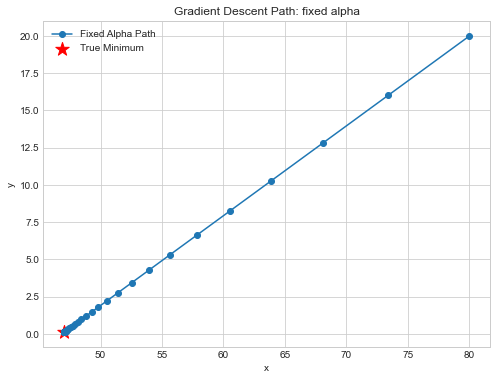

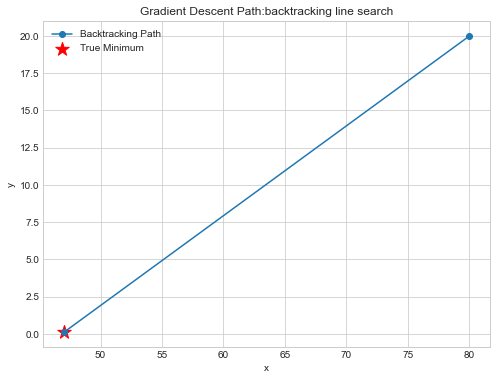

In [9]:
# Example usage:
# Define your function and its gradient
def f_example(X):
    x, y = X
    return (x-47)**2 + (y-0.1)**2 + 2

def grad_f_example(X):
    x, y = X
    return np.array([2*(x-47), 2*(y-0.1)])

#TODO: implement this part of code

# --- Let's test the gradient descent function ---
initial_point = np.array([80.0, 20.0]) # Starting point P = (80, 20)

# Test with fixed alpha
print("\n--- Running Gradient Descent with Fixed Alpha ---")
final_x_fixed, f_vals_fixed, path_fixed, steps_fixed = gradient_descent(
    f=f_example,
    grad_f=grad_f_example,
    x0=initial_point,
    alpha_type='fixed',
    alpha=0.1, # A slightly larger fixed alpha to show faster convergence
    max_steps=1000,
    tolerance=1e-5
)

print(f"Fixed Alpha: Final point: {final_x_fixed}")
print(f"Fixed Alpha: Final function value: {f_example(final_x_fixed)}")
print(f"Fixed Alpha: Steps taken: {steps_fixed}")

# Test with backtracking alpha
print("\n--- Running Gradient Descent with Backtracking Alpha ---")
final_x_backtracking, f_vals_backtracking, path_backtracking, steps_backtracking = gradient_descent(
    f=f_example,
    grad_f=grad_f_example,
    x0=initial_point,
    alpha_type='backtracking',
    alpha=1.0, # Start with a larger alpha for backtracking, it will adjust
    max_steps=1000,
    tolerance=1e-5,
    c1=1e-4,
    c2=0.9,
    rho=0.5,
    max_line_search_iter=50 # Increased max line search iter for robustness
)

print(f"Backtracking Alpha: Final point: {final_x_backtracking}")
print(f"Backtracking Alpha: Final function value: {f_example(final_x_backtracking)}")
print(f"Backtracking Alpha: Steps taken: {steps_backtracking}")

# Ploting the convergence

# Ploting the path using the Fixed Alpha
path_fixed_np = np.array(path_fixed)
plt.figure(figsize=(8,6))
plt.plot(path_fixed_np[:,0], path_fixed_np[:,1], '-o', label='Fixed Alpha Path')
plt.scatter(47, 0.1, color='red', marker='*', s=200, label='True Minimum')
plt.title('Gradient Descent Path: fixed alpha')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# Ploting the path using the Backtracking Line Search
path_fixed_np = np.array(path_backtracking)
plt.figure(figsize=(8,6))
plt.plot(path_fixed_np[:,0], path_fixed_np[:,1], '-o', label='Backtracking Path')
plt.scatter(47, 0.1, color='red', marker='*', s=200, label='True Minimum')
plt.title('Gradient Descent Path:backtracking line search')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


#### show the results of your method for following cases:

- $$f(x) = \sum_{i=1}^{n-1}[100(x_{i+1}-x_i^2)^2+(1-x_i)^2], n = 5$$

- $$ f(x,y) = (x+2y-7)^2 + (2x+y-5)^2 $$

- $$ f(x,y) = (x^2 + y - 11)^2 + (x+y^2-7)^2 $$

- $$ f(x,y) = 2x^2 - 1.05x^4 + \frac{x^6}{6} + xy + y^2$$

- $$ f(x,y) = sin(x+y) + (x-y)^2 - 1.5x + 2.5y + 1 $$

You need to test, for all cases:

different values for fixed alpha, different initial points.

backtracking line search, only 1 initial point for each function, Armijo and Wolfe Conditions.

present the results in a nice visual format.

-----------------------------

## Aplicando o algoritmo do gradiente descendent e testando diferentes alphas fixos, diferentes pontos iniciais e backtraking line search com um ponto inicial

1) Primiera Função: $$f(x) = \sum_{i=1}^{n-1}[100(x_{i+1}-x_i^2)^2+(1-x_i)^2], n = 5$$

In [13]:
# Example usage:
# Define your function and its gradient
def f1_rosenbrock(X):
    n = len(X)
    if n < 2:
        raise ValueError("Rosenbrock function requires at least 2 variables.")
    val = 0
    for i in range(n - 1):
        val += 100 * (X[i+1] - X[i]**2)**2 + (1 - X[i])**2
    return val

def gradf1_rosenbrock(X):
    n = len(X)
    if n < 2:
        raise ValueError("Rosenbrock function requires at least 2 variables.")
    grad = np.zeros(n)

    for i in range(n):
        if i < n - 1: # terms involving x_i and x_{i+1}
            grad[i] += -400 * X[i] * (X[i+1] - X[i]**2)  # Derivative w.r.t x_i from 100(x_{i+1}-x_i^2)^2
            grad[i+1] += 200 * (X[i+1] - X[i]**2)         # Derivative w.r.t x_{i+1} from 100(x_{i+1}-x_i^2)^2
        
        # Derivative w.r.t x_i from (1 - x_i)^2 (this applies to the current i)
        grad[i] += -2 * (1 - X[i])
        
        # If this is not the first element, consider the contribution from the previous term's x_{i}
        # (This logic for Rosenbrock gradient is tricky. Let's make sure it's correct for general n)
        # The sum is from i=1 to n-1. So:
        # d/dx_j (100(x_{j+1}-x_j^2)^2 + (1-x_j)^2)  (for j < n-1)
        # d/dx_j (100(x_j - x_{j-1}^2)^2 + (1-x_j)^2) (for j > 0, from previous term)
        # A more common way to express the gradient for x_j (for 0 < j < n-1):
        # grad[j] = -400 * x[j] * (x[j+1] - x[j]^2) - 2 * (1 - x[j]) + 200 * (x[j] - x[j-1]^2)
        # Let's adjust the loop to be more explicitly correct for each j:
    
    # Recalculate grad for clarity for Rosenbrock
    grad = np.zeros(n)
    for j in range(n):
        if j < n - 1: # Terms from (100(x_{j+1} - x_j^2)^2 + (1 - x_j)^2)
            grad[j] += -400 * X[j] * (X[j+1] - X[j]**2) - 2 * (1 - X[j])
        if j > 0: # Terms from the previous (i=j-1) 100(x_j - x_{j-1}^2)^2 term
            grad[j] += 200 * (X[j] - X[j-1]**2)
            
    return grad

# A common starting point for 5D Rosenbrock, not at the minimum (which is [1,1,1,1,1])
rosenbrock_n = 5
initial_point_rosenbrock1 = np.array([-1.5] * rosenbrock_n)
# The true minimum for Rosenbrock is at X = [1, 1, ..., 1]

# Fixed alpha for Rosenbrock = 0.001 at [-1.5, -1.5, -1.5, -1.5, -1.5]
print(f"\nRunning Fixed Alpha (alpha=0.001) for Rosenbrock (n={rosenbrock_n}) from {initial_point_rosenbrock1}")
final_x_rosenbrock_fixed, f_vals_rosenbrock_fixed, path_rosenbrock_fixed, steps_rosenbrock_fixed = gradient_descent(
    f=f1_rosenbrock,
    grad_f=gradf1_rosenbrock,
    x0=initial_point_rosenbrock1,
    alpha_type='fixed',
    alpha=0.001,
    max_steps=20000, # Rosenbrock can take many steps to converge
    tolerance=1e-5
)
print(f"  Fixed Alpha: Final point: {final_x_rosenbrock_fixed}")
print(f"  Fixed Alpha: Final function value: {f1_rosenbrock(final_x_rosenbrock_fixed):.6f}")
print(f"  Fixed Alpha: Steps taken: {steps_rosenbrock_fixed}")

# Fixed alpha for Rosenbrock = 0.0005 at [-1.5, -1.5, -1.5, -1.5, -1.5]
print(f"\nRunning Fixed Alpha (alpha=0.005) for Rosenbrock (n={rosenbrock_n}) from {initial_point_rosenbrock1}")
final_x_rosenbrock_fixed, f_vals_rosenbrock_fixed, path_rosenbrock_fixed, steps_rosenbrock_fixed = gradient_descent(
    f=f1_rosenbrock,
    grad_f=gradf1_rosenbrock,
    x0=initial_point_rosenbrock1,
    alpha_type='fixed',
    alpha=0.0005,
    max_steps=20000, # Rosenbrock can take many steps to converge
    tolerance=1e-5
)
print(f"  Fixed Alpha: Final point: {final_x_rosenbrock_fixed}")
print(f"  Fixed Alpha: Final function value: {f1_rosenbrock(final_x_rosenbrock_fixed):.6f}")
print(f"  Fixed Alpha: Steps taken: {steps_rosenbrock_fixed}")


# Testing another point 
initial_point_rosenbrock2 = np.array([-1.2] * rosenbrock_n)

# Fixed alpha for Rosenbrock = 0.001 at [-1.2, -1.2, -1.2, -1.2, -1.2]
print(f"\nRunning Fixed Alpha (alpha=0.001) for Rosenbrock (n={rosenbrock_n}) from {initial_point_rosenbrock2}")
final_x_rosenbrock_fixed, f_vals_rosenbrock_fixed, path_rosenbrock_fixed, steps_rosenbrock_fixed = gradient_descent(
    f=f1_rosenbrock,
    grad_f=gradf1_rosenbrock,
    x0=initial_point_rosenbrock2,
    alpha_type='fixed',
    alpha=0.001,
    max_steps=20000, # Rosenbrock can take many steps to converge
    tolerance=1e-5
)
print(f"  Fixed Alpha: Final point: {final_x_rosenbrock_fixed}")
print(f"  Fixed Alpha: Final function value: {f1_rosenbrock(final_x_rosenbrock_fixed):.6f}")
print(f"  Fixed Alpha: Steps taken: {steps_rosenbrock_fixed}")

# Fixed alpha for Rosenbrock = 0.0005 at [-1.2, -1.2, -1.2, -1.2, -1.2]
print(f"\nRunning Fixed Alpha (alpha=0.005) for Rosenbrock (n={rosenbrock_n}) from {initial_point_rosenbrock2}")
final_x_rosenbrock_fixed, f_vals_rosenbrock_fixed, path_rosenbrock_fixed, steps_rosenbrock_fixed = gradient_descent(
    f=f1_rosenbrock,
    grad_f=gradf1_rosenbrock,
    x0=initial_point_rosenbrock2,
    alpha_type='fixed',
    alpha=0.0005,
    max_steps=20000, # Rosenbrock can take many steps to converge
    tolerance=1e-5
)
print(f"  Fixed Alpha: Final point: {final_x_rosenbrock_fixed}")
print(f"  Fixed Alpha: Final function value: {f1_rosenbrock(final_x_rosenbrock_fixed):.6f}")
print(f"  Fixed Alpha: Steps taken: {steps_rosenbrock_fixed}")


# Backtracking alpha for Rosenbrock
print(f"\nRunning Backtracking Line Search (Armijo & Wolfe) for Rosenbrock (n={rosenbrock_n}) from {initial_point_rosenbrock2}")
final_x_rosenbrock_bt, f_vals_rosenbrock_bt, path_rosenbrock_bt, steps_rosenbrock_bt = gradient_descent(
    f=f1_rosenbrock,
    grad_f=gradf1_rosenbrock,
    x0=initial_point_rosenbrock2,
    alpha_type='backtracking',
    alpha=0.1, # Initial alpha for backtracking
    max_steps=20000,
    tolerance=1e-5,
    c1=1e-4,
    c2=0.9,
    rho=0.5,
    max_line_search_iter=50
)


# We will just run the optimization and print results.
print(f"  Backtracking: Final point: {final_x_rosenbrock_bt}")
print(f"  Backtracking: Final function value: {f1_rosenbrock(final_x_rosenbrock_bt):.6f}")
print(f"  Backtracking: Steps taken: {steps_rosenbrock_bt}")
message = "\nFor Rosenbrock with n=5, plotting a contour is not feasible"
print(f"\033[1;31m{message}\033[0m")
#print(f"  \nFor Rosenbrock with n=5, plotting a contour is not feasible")



Running Fixed Alpha (alpha=0.001) for Rosenbrock (n=5) from [-1.5 -1.5 -1.5 -1.5 -1.5]
Maximum steps (20000) reached without convergence (final gradient norm: 0.000016).
  Fixed Alpha: Final point: [0.99999825 0.99999648 0.99999295 0.99998587 0.99997167]
  Fixed Alpha: Final function value: 0.000000
  Fixed Alpha: Steps taken: 20000

Running Fixed Alpha (alpha=0.005) for Rosenbrock (n=5) from [-1.5 -1.5 -1.5 -1.5 -1.5]
Maximum steps (20000) reached without convergence (final gradient norm: 0.003501).
  Fixed Alpha: Final point: [0.99962258 0.99924389 0.9984848  0.99696442 0.9939229 ]
  Fixed Alpha: Final function value: 0.000012
  Fixed Alpha: Steps taken: 20000

Running Fixed Alpha (alpha=0.001) for Rosenbrock (n=5) from [-1.2 -1.2 -1.2 -1.2 -1.2]
Maximum steps (20000) reached without convergence (final gradient norm: 0.000020).
  Fixed Alpha: Final point: [0.99999789 0.99999578 0.99999154 0.99998303 0.99996597]
  Fixed Alpha: Final function value: 0.000000
  Fixed Alpha: Steps taken

2) Segunda Função: $$ f(x,y) = (x+2y-7)^2 + (2x+y-5)^2 $$


--- Testing Function 2: (x + 2y - 7)^2 + (2x + y - 5)^2 ---

Running Fixed Alpha (alpha=0.01) from Start Point 1: [0. 0.]
Converged after 622 steps (gradient norm: 0.000010 < 1e-05).


C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1324\4142470470.py:52: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='f(x, y)')


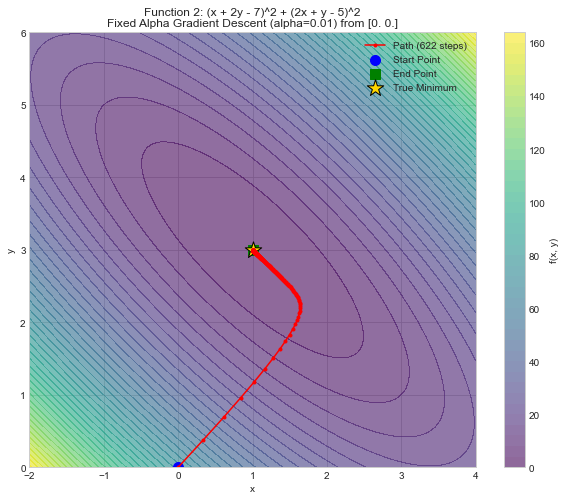

  Final point: [1.00000349 2.99999651]
  Final function value: 0.000000
  Steps taken: 622

Running Fixed Alpha (alpha=0.005) from Start Point 1: [0. 0.]
Converged after 1249 steps (gradient norm: 0.000010 < 1e-05).


C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1324\4142470470.py:52: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='f(x, y)')


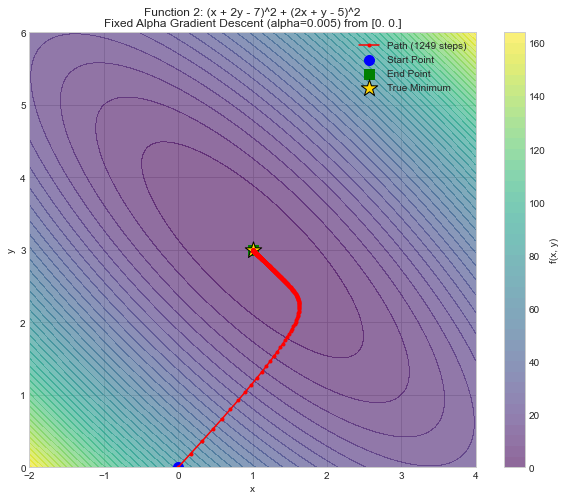

  Final point: [1.00000353 2.99999647]
  Final function value: 0.000000
  Steps taken: 1249

Running Fixed Alpha (alpha=0.01) from Start Point 2: [ 5. -2.]
Converged after 696 steps (gradient norm: 0.000010 < 1e-05).


C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1324\4142470470.py:52: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='f(x, y)')


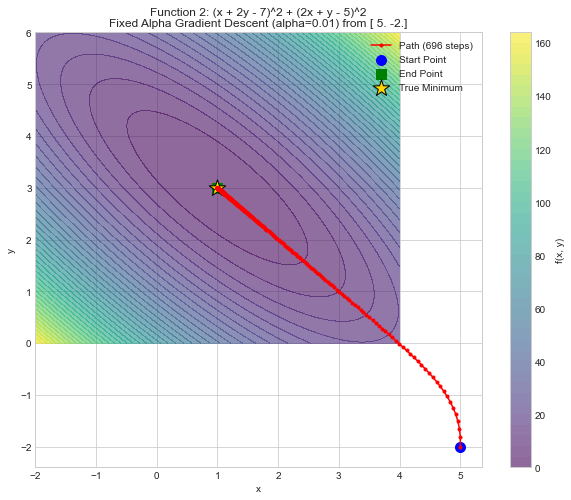

  Final point: [1.00000352 2.99999648]
  Final function value: 0.000000
  Steps taken: 696

Running Fixed Alpha (alpha=0.005) from Start Point 2: [ 5. -2.]
Converged after 1399 steps (gradient norm: 0.000010 < 1e-05).


C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1324\4142470470.py:52: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='f(x, y)')


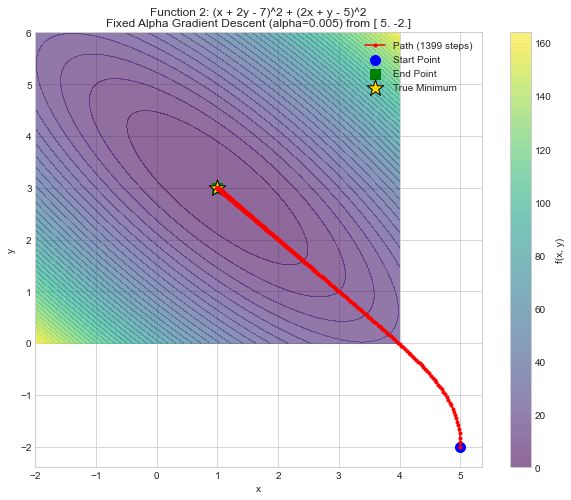

  Final point: [1.00000352 2.99999648]
  Final function value: 0.000000
  Steps taken: 1399

Running Backtracking Line Search from Initial Point: [0. 0.]
Converged after 33 steps (gradient norm: 0.000008 < 1e-05).


C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1324\4142470470.py:92: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='f(x, y)')


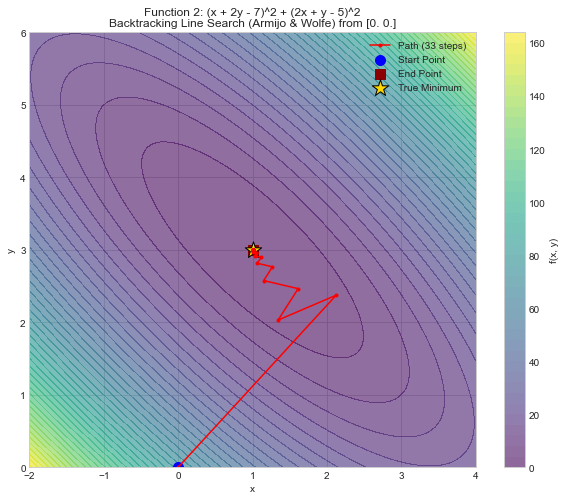

  Backtracking: Final point: [1.00000253 2.9999978 ]
  Backtracking: Final function value: 0.000000
  Backtracking: Steps taken: 33


In [22]:
# Example usage:
# Define your function and its gradient
def f2(X):
    x, y = X
    return (x + 2*y - 7)**2 + (2*x + y - 5)**2

def gradf2(X):
    x, y = X
    df_dx = 2 * (x + 2*y - 7) * 1 + 2 * (2*x + y - 5) * 2
    df_dy = 2 * (x + 2*y - 7) * 2 + 2 * (2*x + y - 5) * 1
    return np.array([df_dx, df_dy])

test_cases = [
    {
        'name': 'Function 2: (x + 2y - 7)^2 + (2x + y - 5)^2',
        'f': f2,
        'gradf': gradf2,
        'initial_points': [np.array([0.0, 0.0]), np.array([5.0, -2.0])],
        'fixed_alphas': [0.01, 0.005],
        'backtracking_alpha_start': 1.0,
        'true_min': np.array([1.0, 3.0]), # Solution to x+2y=7, 2x+y=5
        'x_range_plot': [-2, 4],
        'y_range_plot': [0, 6]
    },
]

# Run tests and plot results for 2D functions
for case in test_cases:
    print(f"\n--- Testing {case['name']} ---")

    # Fixed Alpha Tests
    for i, start_point in enumerate(case['initial_points']):
        for j, alpha_val in enumerate(case['fixed_alphas']):
            print(f"\nRunning Fixed Alpha (alpha={alpha_val}) from Start Point {i+1}: {start_point}")
            final_x, f_vals, path, steps = gradient_descent(
                f=case['f'],
                grad_f=case['gradf'],
                x0=start_point,
                alpha_type='fixed',
                alpha=alpha_val,
                max_steps=5000, # Increased max steps for fixed alpha
                tolerance=1e-5
            )
            df_path = pd.DataFrame(path, columns=['x', 'y'])

            plt.figure(figsize=(10, 8))
            X_grid, Y_grid = np.meshgrid(np.linspace(case['x_range_plot'][0], case['x_range_plot'][1], 100),
                                         np.linspace(case['y_range_plot'][0], case['y_range_plot'][1], 100))
            Z_grid = case['f'](np.array([X_grid, Y_grid]))

            plt.contourf(X_grid, Y_grid, Z_grid, levels=50, cmap='viridis', alpha=0.6)
            plt.colorbar(label='f(x, y)')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.title(f"{case['name']}\nFixed Alpha Gradient Descent (alpha={alpha_val}) from {start_point}")
            plt.plot(df_path['x'], df_path['y'], marker='.', linestyle='-', color='red', label=f'Path ({steps} steps)')
            plt.scatter(start_point[0], start_point[1], color='blue', s=100, label='Start Point')
            plt.scatter(final_x[0], final_x[1], color='green', s=100, marker='s', label='End Point')
            if case['true_min'] is not None:
                plt.scatter(case['true_min'][0], case['true_min'][1], color='gold', marker='*', s=300, edgecolor='black', label='True Minimum')
            plt.legend()
            plt.grid(True)
            plt.show()

            print(f"  Final point: {final_x}")
            print(f"  Final function value: {case['f'](final_x):.6f}")
            print(f"  Steps taken: {steps}")

    # Backtracking Line Search Test (only 1 initial point per function)
    print(f"\nRunning Backtracking Line Search from Initial Point: {case['initial_points'][0]}")
    final_x_bt, f_vals_bt, path_bt, steps_bt = gradient_descent(
        f=case['f'],
        grad_f=case['gradf'],
        x0=case['initial_points'][0], # Use the first initial point
        alpha_type='backtracking',
        alpha=case['backtracking_alpha_start'],
        max_steps=5000,
        tolerance=1e-5,
        c1=1e-4,
        c2=0.9, # Use the default c2, or customize if needed
        rho=0.5,
        max_line_search_iter=20
    )
    df_path_bt = pd.DataFrame(path_bt, columns=['x', 'y'])

    plt.figure(figsize=(10, 8))
    X_grid, Y_grid = np.meshgrid(np.linspace(case['x_range_plot'][0], case['x_range_plot'][1], 100),
                                 np.linspace(case['y_range_plot'][0], case['y_range_plot'][1], 100))
    Z_grid = case['f'](np.array([X_grid, Y_grid]))

    plt.contourf(X_grid, Y_grid, Z_grid, levels=50, cmap='viridis', alpha=0.6)
    plt.colorbar(label='f(x, y)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"{case['name']}\nBacktracking Line Search (Armijo & Wolfe) from {case['initial_points'][0]}")
    plt.plot(df_path_bt['x'], df_path_bt['y'], marker='.', linestyle='-', color='red', label=f'Path ({steps_bt} steps)')
    plt.scatter(case['initial_points'][0][0], case['initial_points'][0][1], color='blue', s=100, label='Start Point')
    plt.scatter(final_x_bt[0], final_x_bt[1], color='darkred', s=100, marker='s', label='End Point')
    if case['true_min'] is not None:
        plt.scatter(case['true_min'][0], case['true_min'][1], color='gold', marker='*', s=300, edgecolor='black', label='True Minimum')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"  Backtracking: Final point: {final_x_bt}")
    print(f"  Backtracking: Final function value: {case['f'](final_x_bt):.6f}")
    print(f"  Backtracking: Steps taken: {steps_bt}")

3) Terceira Função: $$ f(x,y) = (x^2 + y - 11)^2 + (x+y^2-7)^2 $$


--- Testing Function 4: (x^2 + y - 11)^2 + (x + y^2 - 7)^2 ---

Running Fixed Alpha (alpha=0.001) from Start Point 1: [1. 1.]
Converged after 525 steps (gradient norm: 0.000010 < 1e-05).


C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1324\1337616525.py:52: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='f(x, y)')


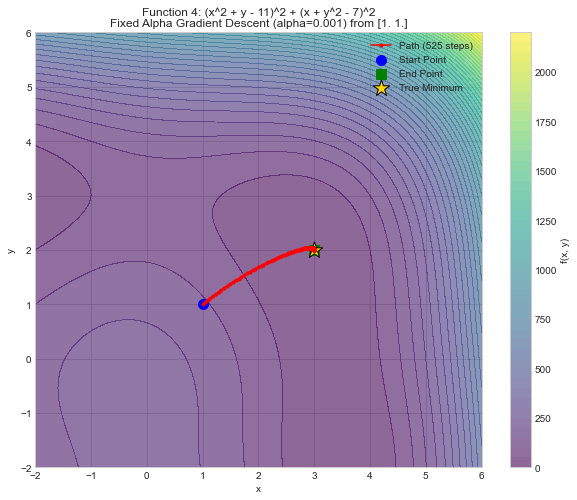

  Final point: [2.99999985 2.00000035]
  Final function value: 0.000000
  Steps taken: 525

Running Fixed Alpha (alpha=0.0005) from Start Point 1: [1. 1.]
Converged after 1054 steps (gradient norm: 0.000010 < 1e-05).


C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1324\1337616525.py:52: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='f(x, y)')


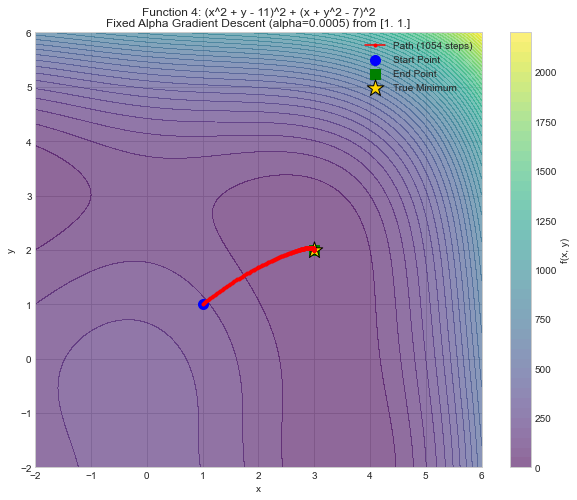

  Final point: [2.99999985 2.00000035]
  Final function value: 0.000000
  Steps taken: 1054

Running Fixed Alpha (alpha=0.001) from Start Point 2: [5. 5.]
Converged after 547 steps (gradient norm: 0.000010 < 1e-05).


C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1324\1337616525.py:52: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='f(x, y)')


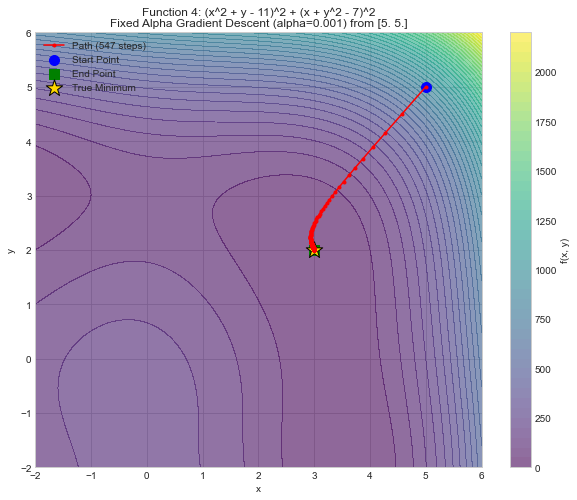

  Final point: [2.99999985 2.00000035]
  Final function value: 0.000000
  Steps taken: 547

Running Fixed Alpha (alpha=0.0005) from Start Point 2: [5. 5.]
Converged after 1102 steps (gradient norm: 0.000010 < 1e-05).


C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1324\1337616525.py:52: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='f(x, y)')


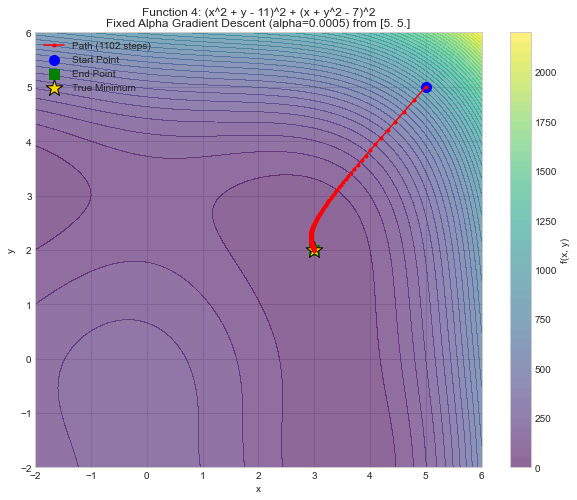

  Final point: [2.99999985 2.00000036]
  Final function value: 0.000000
  Steps taken: 1102

Running Backtracking Line Search from Initial Point: [1. 1.]
Converged after 19 steps (gradient norm: 0.000003 < 1e-05).


C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1324\1337616525.py:92: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='f(x, y)')


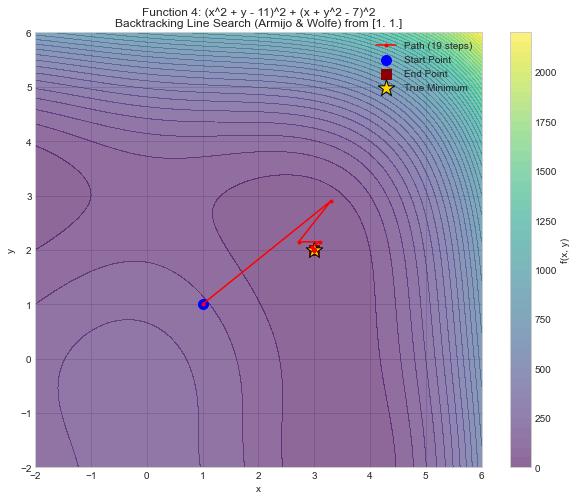

  Backtracking: Final point: [2.99999998 2.00000012]
  Backtracking: Final function value: 0.000000
  Backtracking: Steps taken: 19


In [15]:
# Example usage:
# Define your function and its gradient
def f3(X):
    x, y = X
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

def gradf3(X):
    x, y = X
    df_dx = 2 * (x**2 + y - 11) * (2*x) + 2 * (x + y**2 - 7) * 1
    df_dy = 2 * (x**2 + y - 11) * 1 + 2 * (x + y**2 - 7) * (2*y)
    return np.array([df_dx, df_dy])

test_cases = [
    {
        'name': 'Function 4: (x^2 + y - 11)^2 + (x + y^2 - 7)^2',
        'f': f3,
        'gradf': gradf3,
        'initial_points': [np.array([1.0, 1.0]), np.array([5.0, 5.0])],
        'fixed_alphas': [0.001, 0.0005], # Reduced alpha for this function as it can be sensitive
        'backtracking_alpha_start': 0.1,
        'true_min': np.array([3.0, 2.0]), # One of the known minima for Himmelblau's-like functions
        'x_range_plot': [-2, 6],
        'y_range_plot': [-2, 6]
    }
]

# Run tests and plot results for 2D functions
for case in test_cases:
    print(f"\n--- Testing {case['name']} ---")

    # Fixed Alpha Tests
    for i, start_point in enumerate(case['initial_points']):
        for j, alpha_val in enumerate(case['fixed_alphas']):
            print(f"\nRunning Fixed Alpha (alpha={alpha_val}) from Start Point {i+1}: {start_point}")
            final_x, f_vals, path, steps = gradient_descent(
                f=case['f'],
                grad_f=case['gradf'],
                x0=start_point,
                alpha_type='fixed',
                alpha=alpha_val,
                max_steps=5000, # Increased max steps for fixed alpha
                tolerance=1e-5
            )
            df_path = pd.DataFrame(path, columns=['x', 'y'])

            plt.figure(figsize=(10, 8))
            X_grid, Y_grid = np.meshgrid(np.linspace(case['x_range_plot'][0], case['x_range_plot'][1], 100),
                                         np.linspace(case['y_range_plot'][0], case['y_range_plot'][1], 100))
            Z_grid = case['f'](np.array([X_grid, Y_grid]))

            plt.contourf(X_grid, Y_grid, Z_grid, levels=50, cmap='viridis', alpha=0.6)
            plt.colorbar(label='f(x, y)')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.title(f"{case['name']}\nFixed Alpha Gradient Descent (alpha={alpha_val}) from {start_point}")
            plt.plot(df_path['x'], df_path['y'], marker='.', linestyle='-', color='red', label=f'Path ({steps} steps)')
            plt.scatter(start_point[0], start_point[1], color='blue', s=100, label='Start Point')
            plt.scatter(final_x[0], final_x[1], color='green', s=100, marker='s', label='End Point')
            if case['true_min'] is not None:
                plt.scatter(case['true_min'][0], case['true_min'][1], color='gold', marker='*', s=300, edgecolor='black', label='True Minimum')
            plt.legend()
            plt.grid(True)
            plt.show()

            print(f"  Final point: {final_x}")
            print(f"  Final function value: {case['f'](final_x):.6f}")
            print(f"  Steps taken: {steps}")

    # Backtracking Line Search Test (only 1 initial point per function)
    print(f"\nRunning Backtracking Line Search from Initial Point: {case['initial_points'][0]}")
    final_x_bt, f_vals_bt, path_bt, steps_bt = gradient_descent(
        f=case['f'],
        grad_f=case['gradf'],
        x0=case['initial_points'][0], # Use the first initial point
        alpha_type='backtracking',
        alpha=case['backtracking_alpha_start'],
        max_steps=5000,
        tolerance=1e-5,
        c1=1e-4,
        c2=0.9, # Use the default c2, or customize if needed
        rho=0.5,
        max_line_search_iter=20
    )
    df_path_bt = pd.DataFrame(path_bt, columns=['x', 'y'])

    plt.figure(figsize=(10, 8))
    X_grid, Y_grid = np.meshgrid(np.linspace(case['x_range_plot'][0], case['x_range_plot'][1], 100),
                                 np.linspace(case['y_range_plot'][0], case['y_range_plot'][1], 100))
    Z_grid = case['f'](np.array([X_grid, Y_grid]))

    plt.contourf(X_grid, Y_grid, Z_grid, levels=50, cmap='viridis', alpha=0.6)
    plt.colorbar(label='f(x, y)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"{case['name']}\nBacktracking Line Search (Armijo & Wolfe) from {case['initial_points'][0]}")
    plt.plot(df_path_bt['x'], df_path_bt['y'], marker='.', linestyle='-', color='red', label=f'Path ({steps_bt} steps)')
    plt.scatter(case['initial_points'][0][0], case['initial_points'][0][1], color='blue', s=100, label='Start Point')
    plt.scatter(final_x_bt[0], final_x_bt[1], color='darkred', s=100, marker='s', label='End Point')
    if case['true_min'] is not None:
        plt.scatter(case['true_min'][0], case['true_min'][1], color='gold', marker='*', s=300, edgecolor='black', label='True Minimum')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"  Backtracking: Final point: {final_x_bt}")
    print(f"  Backtracking: Final function value: {case['f'](final_x_bt):.6f}")
    print(f"  Backtracking: Steps taken: {steps_bt}")

4) Quarta Função: $$ f(x,y) = 2x^2 - 1.05x^4 + \frac{x^6}{6} + xy + y^2$$


--- Testing Function 4: 2x^2 - 1.05x^4 + x^6/6 + xy + y^2 ---

Running Fixed Alpha (alpha=0.01) from Start Point 1: [1. 1.]
Converged after 680 steps (gradient norm: 0.000010 < 1e-05).


C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1324\893612854.py:52: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='f(x, y)')


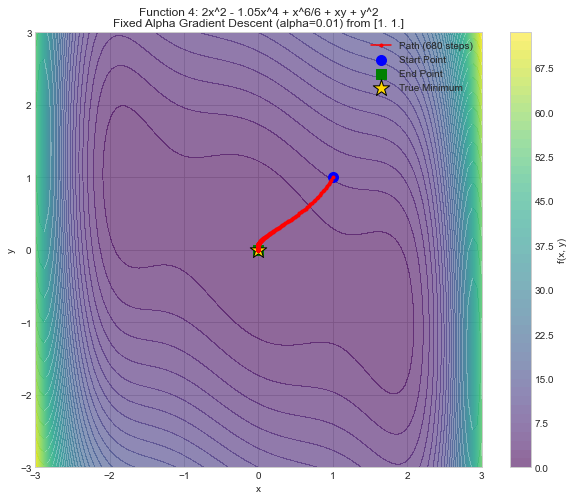

  Final point: [-2.37645229e-06  5.73726361e-06]
  Final function value: 0.000000
  Steps taken: 680

Running Fixed Alpha (alpha=0.005) from Start Point 1: [1. 1.]
Converged after 1366 steps (gradient norm: 0.000010 < 1e-05).


C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1324\893612854.py:52: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='f(x, y)')


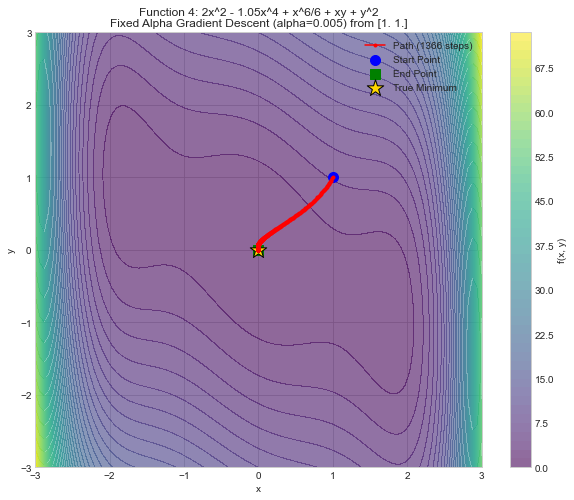

  Final point: [-2.40655609e-06  5.80994067e-06]
  Final function value: 0.000000
  Steps taken: 1366

Running Fixed Alpha (alpha=0.01) from Start Point 2: [3. 3.]
Converged after 756 steps (gradient norm: 0.000010 < 1e-05).


C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1324\893612854.py:52: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='f(x, y)')


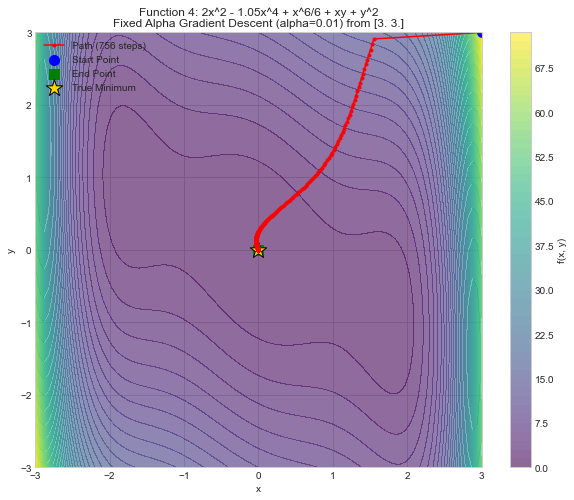

  Final point: [-2.39995459e-06  5.79400295e-06]
  Final function value: 0.000000
  Steps taken: 756

Running Fixed Alpha (alpha=0.005) from Start Point 2: [3. 3.]
Converged after 1454 steps (gradient norm: 0.000010 < 1e-05).


C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1324\893612854.py:52: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='f(x, y)')


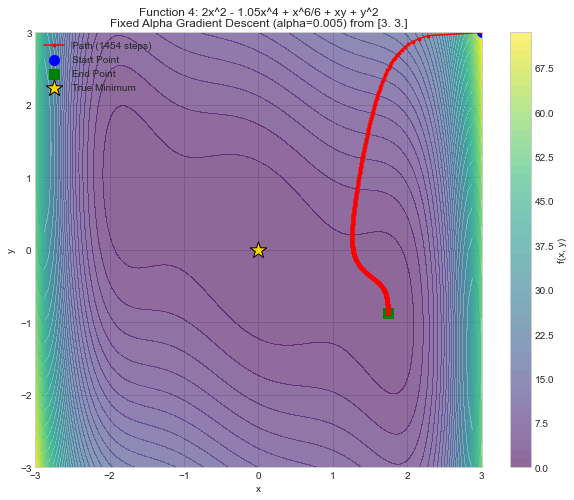

  Final point: [ 1.74755184 -0.87377095]
  Final function value: 0.298638
  Steps taken: 1454

Running Backtracking Line Search from Initial Point: [1. 1.]
Converged after 61 steps (gradient norm: 0.000009 < 1e-05).


C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1324\893612854.py:92: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='f(x, y)')


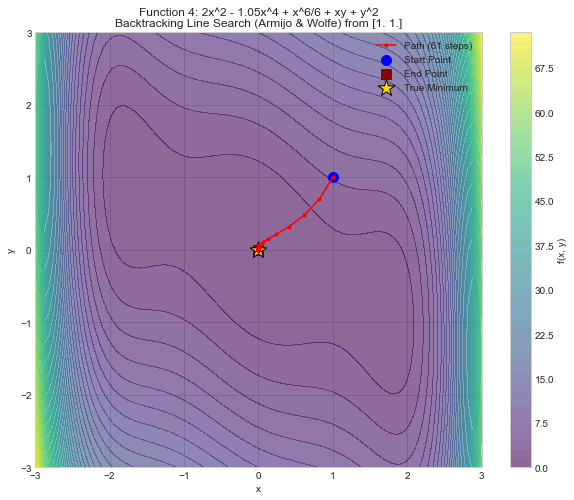

  Backtracking: Final point: [-2.09161359e-06  5.04960189e-06]
  Backtracking: Final function value: 0.000000
  Backtracking: Steps taken: 61


In [16]:
# Example usage:
# Define your function and its gradient
def f4(X):
    x, y = X
    return 2*x**2 - 1.05*x**4 + x**6/6 + x*y + y**2

def gradf4(X):
    x, y = X
    df_dx = 4*x - 4.2*x**3 + x**5 + y
    df_dy = x + 2*y
    return np.array([df_dx, df_dy])

test_cases = [
    {
        'name': 'Function 4: 2x^2 - 1.05x^4 + x^6/6 + xy + y^2',
        'f': f4,
        'gradf': gradf4,
        'initial_points': [np.array([1.0, 1.0]), np.array([3.0, 3.0])],
        'fixed_alphas': [0.01, 0.005],
        'backtracking_alpha_start': 0.1,
        'true_min': np.array([0.0, 0.0]), # Local minimum at (0,0)
        'x_range_plot': [-3, 3],
        'y_range_plot': [-3, 3]
    }
]

# Run tests and plot results for 2D functions
for case in test_cases:
    print(f"\n--- Testing {case['name']} ---")

    # Fixed Alpha Tests
    for i, start_point in enumerate(case['initial_points']):
        for j, alpha_val in enumerate(case['fixed_alphas']):
            print(f"\nRunning Fixed Alpha (alpha={alpha_val}) from Start Point {i+1}: {start_point}")
            final_x, f_vals, path, steps = gradient_descent(
                f=case['f'],
                grad_f=case['gradf'],
                x0=start_point,
                alpha_type='fixed',
                alpha=alpha_val,
                max_steps=5000, # Increased max steps for fixed alpha
                tolerance=1e-5
            )
            df_path = pd.DataFrame(path, columns=['x', 'y'])

            plt.figure(figsize=(10, 8))
            X_grid, Y_grid = np.meshgrid(np.linspace(case['x_range_plot'][0], case['x_range_plot'][1], 100),
                                         np.linspace(case['y_range_plot'][0], case['y_range_plot'][1], 100))
            Z_grid = case['f'](np.array([X_grid, Y_grid]))

            plt.contourf(X_grid, Y_grid, Z_grid, levels=50, cmap='viridis', alpha=0.6)
            plt.colorbar(label='f(x, y)')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.title(f"{case['name']}\nFixed Alpha Gradient Descent (alpha={alpha_val}) from {start_point}")
            plt.plot(df_path['x'], df_path['y'], marker='.', linestyle='-', color='red', label=f'Path ({steps} steps)')
            plt.scatter(start_point[0], start_point[1], color='blue', s=100, label='Start Point')
            plt.scatter(final_x[0], final_x[1], color='green', s=100, marker='s', label='End Point')
            if case['true_min'] is not None:
                plt.scatter(case['true_min'][0], case['true_min'][1], color='gold', marker='*', s=300, edgecolor='black', label='True Minimum')
            plt.legend()
            plt.grid(True)
            plt.show()

            print(f"  Final point: {final_x}")
            print(f"  Final function value: {case['f'](final_x):.6f}")
            print(f"  Steps taken: {steps}")

    # Backtracking Line Search Test (only 1 initial point per function)
    print(f"\nRunning Backtracking Line Search from Initial Point: {case['initial_points'][0]}")
    final_x_bt, f_vals_bt, path_bt, steps_bt = gradient_descent(
        f=case['f'],
        grad_f=case['gradf'],
        x0=case['initial_points'][0], # Use the first initial point
        alpha_type='backtracking',
        alpha=case['backtracking_alpha_start'],
        max_steps=5000,
        tolerance=1e-5,
        c1=1e-4,
        c2=0.9, # Use the default c2, or customize if needed
        rho=0.5,
        max_line_search_iter=20
    )
    df_path_bt = pd.DataFrame(path_bt, columns=['x', 'y'])

    plt.figure(figsize=(10, 8))
    X_grid, Y_grid = np.meshgrid(np.linspace(case['x_range_plot'][0], case['x_range_plot'][1], 100),
                                 np.linspace(case['y_range_plot'][0], case['y_range_plot'][1], 100))
    Z_grid = case['f'](np.array([X_grid, Y_grid]))

    plt.contourf(X_grid, Y_grid, Z_grid, levels=50, cmap='viridis', alpha=0.6)
    plt.colorbar(label='f(x, y)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"{case['name']}\nBacktracking Line Search (Armijo & Wolfe) from {case['initial_points'][0]}")
    plt.plot(df_path_bt['x'], df_path_bt['y'], marker='.', linestyle='-', color='red', label=f'Path ({steps_bt} steps)')
    plt.scatter(case['initial_points'][0][0], case['initial_points'][0][1], color='blue', s=100, label='Start Point')
    plt.scatter(final_x_bt[0], final_x_bt[1], color='darkred', s=100, marker='s', label='End Point')
    if case['true_min'] is not None:
        plt.scatter(case['true_min'][0], case['true_min'][1], color='gold', marker='*', s=300, edgecolor='black', label='True Minimum')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"  Backtracking: Final point: {final_x_bt}")
    print(f"  Backtracking: Final function value: {case['f'](final_x_bt):.6f}")
    print(f"  Backtracking: Steps taken: {steps_bt}")

5) Quinta Função: $$ f(x,y) = sin(x+y) + (x-y)^2 - 1.5x + 2.5y + 1 $$


--- Testing Function 5: sin(x + y) + (x - y)^2 - 1.5x + 2.5y + 1 ---

Running Fixed Alpha (alpha=0.01) from Start Point 1: [0. 0.]
Converged after 702 steps (gradient norm: 0.000010 < 1e-05).


C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1324\3825753696.py:53: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='f(x, y)')


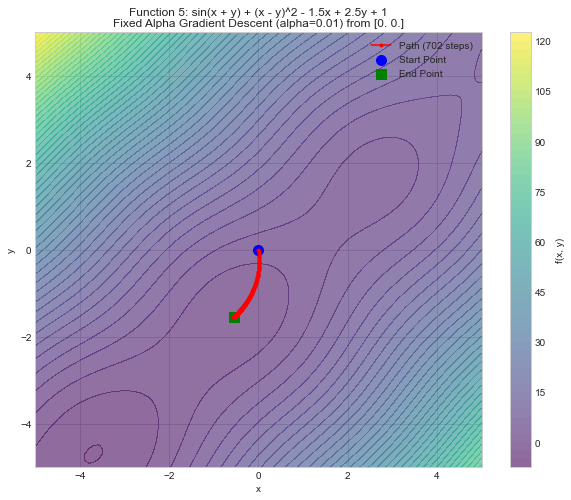

  Final point: [-0.54719347 -1.54719347]
  Final function value: -1.913223
  Steps taken: 702

Running Fixed Alpha (alpha=0.005) from Start Point 1: [0. 0.]
Converged after 1411 steps (gradient norm: 0.000010 < 1e-05).


C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1324\3825753696.py:53: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='f(x, y)')


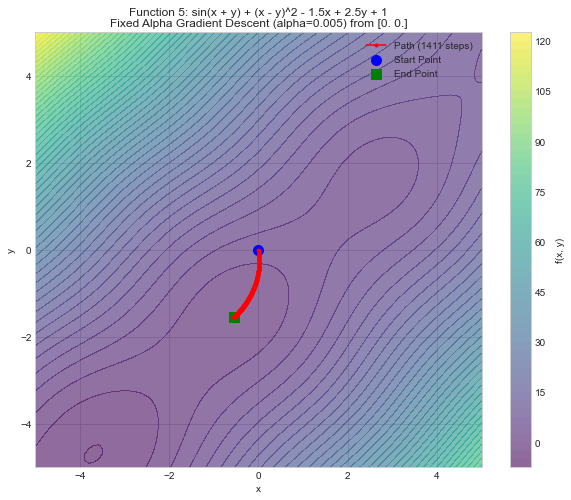

  Final point: [-0.5471935 -1.5471935]
  Final function value: -1.913223
  Steps taken: 1411

Running Fixed Alpha (alpha=0.01) from Start Point 2: [ 3.14 -3.14]
Converged after 702 steps (gradient norm: 0.000010 < 1e-05).


C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1324\3825753696.py:53: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='f(x, y)')


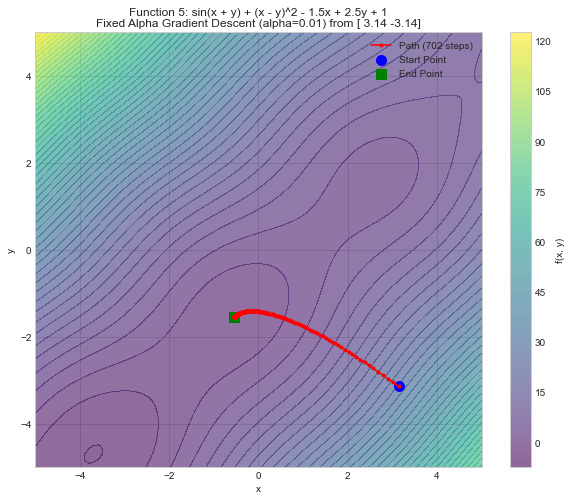

  Final point: [-0.54719347 -1.54719347]
  Final function value: -1.913223
  Steps taken: 702

Running Fixed Alpha (alpha=0.005) from Start Point 2: [ 3.14 -3.14]
Converged after 1411 steps (gradient norm: 0.000010 < 1e-05).


C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1324\3825753696.py:53: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='f(x, y)')


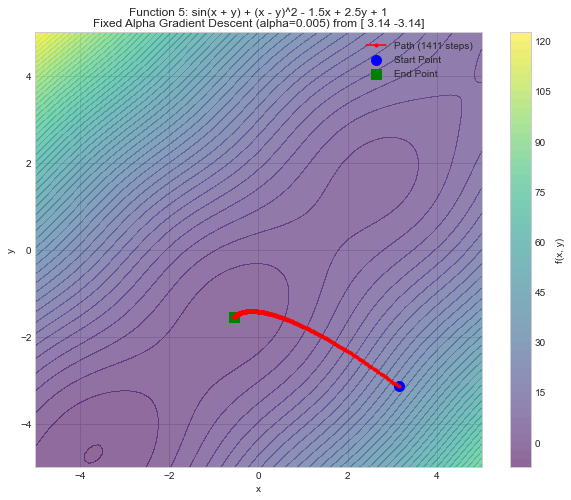

  Final point: [-0.5471935 -1.5471935]
  Final function value: -1.913223
  Steps taken: 1411

Running Backtracking Line Search from Initial Point: [0. 0.]
Converged after 65 steps (gradient norm: 0.000009 < 1e-05).


C:\Users\kaiqu\AppData\Local\Temp\ipykernel_1324\3825753696.py:93: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  plt.colorbar(label='f(x, y)')


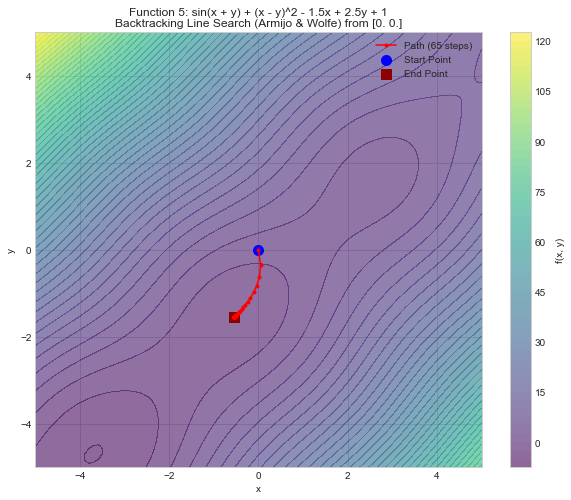

  Backtracking: Final point: [-0.54719384 -1.54719384]
  Backtracking: Final function value: -1.913223
  Backtracking: Steps taken: 65


In [17]:
# Example usage:
# Define your function and its gradient
def f5(X):
    x, y = X
    return np.sin(x + y) + (x - y)**2 - 1.5*x + 2.5*y + 1

def gradf5(X):
    x, y = X
    df_dx = np.cos(x + y) + 2*(x - y) - 1.5
    df_dy = np.cos(x + y) + 2*(x - y)*(-1) + 2.5 # Derivative of (x-y)^2 w.r.t y is 2*(x-y)*(-1)
    return np.array([df_dx, df_dy])

test_cases = [
    {
        'name': 'Function 5: sin(x + y) + (x - y)^2 - 1.5x + 2.5y + 1',
        'f': f5,
        'gradf': gradf5,
        'initial_points': [np.array([0.0, 0.0]), np.array([3.14, -3.14])],
        'fixed_alphas': [0.01, 0.005],
        'backtracking_alpha_start': 0.1,
        'true_min': None, # This function doesn't have a simple analytical minimum easily stated.
                          # We'll see where GD converges for different starts.
        'x_range_plot': [-5, 5],
        'y_range_plot': [-5, 5]
    }
]

# Run tests and plot results for 2D functions
for case in test_cases:
    print(f"\n--- Testing {case['name']} ---")

    # Fixed Alpha Tests
    for i, start_point in enumerate(case['initial_points']):
        for j, alpha_val in enumerate(case['fixed_alphas']):
            print(f"\nRunning Fixed Alpha (alpha={alpha_val}) from Start Point {i+1}: {start_point}")
            final_x, f_vals, path, steps = gradient_descent(
                f=case['f'],
                grad_f=case['gradf'],
                x0=start_point,
                alpha_type='fixed',
                alpha=alpha_val,
                max_steps=5000, # Increased max steps for fixed alpha
                tolerance=1e-5
            )
            df_path = pd.DataFrame(path, columns=['x', 'y'])

            plt.figure(figsize=(10, 8))
            X_grid, Y_grid = np.meshgrid(np.linspace(case['x_range_plot'][0], case['x_range_plot'][1], 100),
                                         np.linspace(case['y_range_plot'][0], case['y_range_plot'][1], 100))
            Z_grid = case['f'](np.array([X_grid, Y_grid]))

            plt.contourf(X_grid, Y_grid, Z_grid, levels=50, cmap='viridis', alpha=0.6)
            plt.colorbar(label='f(x, y)')
            plt.xlabel('x')
            plt.ylabel('y')
            plt.title(f"{case['name']}\nFixed Alpha Gradient Descent (alpha={alpha_val}) from {start_point}")
            plt.plot(df_path['x'], df_path['y'], marker='.', linestyle='-', color='red', label=f'Path ({steps} steps)')
            plt.scatter(start_point[0], start_point[1], color='blue', s=100, label='Start Point')
            plt.scatter(final_x[0], final_x[1], color='green', s=100, marker='s', label='End Point')
            if case['true_min'] is not None:
                plt.scatter(case['true_min'][0], case['true_min'][1], color='gold', marker='*', s=300, edgecolor='black', label='True Minimum')
            plt.legend()
            plt.grid(True)
            plt.show()

            print(f"  Final point: {final_x}")
            print(f"  Final function value: {case['f'](final_x):.6f}")
            print(f"  Steps taken: {steps}")

    # Backtracking Line Search Test (only 1 initial point per function)
    print(f"\nRunning Backtracking Line Search from Initial Point: {case['initial_points'][0]}")
    final_x_bt, f_vals_bt, path_bt, steps_bt = gradient_descent(
        f=case['f'],
        grad_f=case['gradf'],
        x0=case['initial_points'][0], # Use the first initial point
        alpha_type='backtracking',
        alpha=case['backtracking_alpha_start'],
        max_steps=5000,
        tolerance=1e-5,
        c1=1e-4,
        c2=0.9, # Use the default c2, or customize if needed
        rho=0.5,
        max_line_search_iter=20
    )
    df_path_bt = pd.DataFrame(path_bt, columns=['x', 'y'])

    plt.figure(figsize=(10, 8))
    X_grid, Y_grid = np.meshgrid(np.linspace(case['x_range_plot'][0], case['x_range_plot'][1], 100),
                                 np.linspace(case['y_range_plot'][0], case['y_range_plot'][1], 100))
    Z_grid = case['f'](np.array([X_grid, Y_grid]))

    plt.contourf(X_grid, Y_grid, Z_grid, levels=50, cmap='viridis', alpha=0.6)
    plt.colorbar(label='f(x, y)')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f"{case['name']}\nBacktracking Line Search (Armijo & Wolfe) from {case['initial_points'][0]}")
    plt.plot(df_path_bt['x'], df_path_bt['y'], marker='.', linestyle='-', color='red', label=f'Path ({steps_bt} steps)')
    plt.scatter(case['initial_points'][0][0], case['initial_points'][0][1], color='blue', s=100, label='Start Point')
    plt.scatter(final_x_bt[0], final_x_bt[1], color='darkred', s=100, marker='s', label='End Point')
    if case['true_min'] is not None:
        plt.scatter(case['true_min'][0], case['true_min'][1], color='gold', marker='*', s=300, edgecolor='black', label='True Minimum')
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"  Backtracking: Final point: {final_x_bt}")
    print(f"  Backtracking: Final function value: {case['f'](final_x_bt):.6f}")
    print(f"  Backtracking: Steps taken: {steps_bt}")

In [19]:
#Function to calculate Gradient of given function
#Using Forward Difference Method
def grad(x):                    
    value = np.zeros(len(x))    
    xd = x.copy()
    h = 10**-6
    for j in range(len(x)):
        xd[j] = x[j] + h
        value[j] = (func(xd) - func(x))/h
        xd = x.copy()
    return value
 
#Function for calculating Function Value 
def func(x):                     
    return 20*(x[1] - x[0]**2)**2 + (1 - x[0])**2

result = gradient_descent(func, grad, [0, 0], alpha_type='fixed', alpha=0.01)
#plot_convergence_path(func, result[2], "Gradient Descent with Fixed Alpha=0.01", x_range = [-2,2], y_range = [-2,2])

Maximum steps (1000) reached without convergence (final gradient norm: 0.005138).


In [20]:
result = gradient_descent(func, grad, [0, 0], alpha_type='backtracking', alpha=1.0)
#plot_convergence_path(func, result[2], "Gradient Descent with backtracking", x_range = [-2,2], y_range = [-2,2])

Maximum steps (1000) reached without convergence (final gradient norm: 0.004279).
